# Car Price Prediction with ML

✅ This assignment is completed by `Mohammad Khorshed Alam`

---

In [98]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [99]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [100]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

# Data Exploration & Error Handling

In [101]:
df.shape

(202, 26)

In [102]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(1)

In [103]:
# Droping duplicated row
df.drop_duplicates(inplace=True)

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.shape

(201, 26)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

⭐ **Conclusions:**

The features `bore`, `stroke`, `horsepower`, and `peak-rpm` contain quantitative measurements that should be represented as numerical data types. Currently, these columns are incorrectly classified as object/string types in the dataset.

⭐ **Recommended Action:**

We need to convert these columns to appropriate numerical data types (float64 or Int64) while handling any non-numeric values or missing data appropriately.

In [107]:
# Converting to numeric data type
cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [108]:
# Checking for null values
df.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [109]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [110]:
num_cols = df.select_dtypes(include=['int', 'float']) # Numerical features
cat_cols = df.select_dtypes(include='object') # Categorical features

print(f'Number of numerical features: {num_cols.shape[1]}')
print(f'Number of categorical features: {cat_cols.shape[1]}')


Number of numerical features: 16
Number of categorical features: 10


⭐ **Conclusions:**
- Total values 201 and Total columns (features) 26 (initially was 202, 26).
- There was one duplicated row, which was dropped.
- 37 null values in `normalized-losses` feature, 2 in `num-of-doors`, 4 in `bore`, 4 in `stroke`, 2 in `horsepower`, and 2 in `peak-rpm`.
- In this dataset, there are 16 numerical features and 10 categorical features.

## Missing Value Handling

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### For normalized-losses Feature
- 37 missing values in this feature

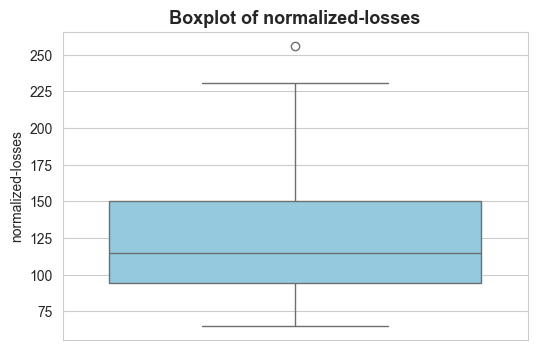

In [112]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='normalized-losses', color='skyblue')
plt.title('Boxplot of normalized-losses', fontsize=13, fontweight='bold')
plt.show()

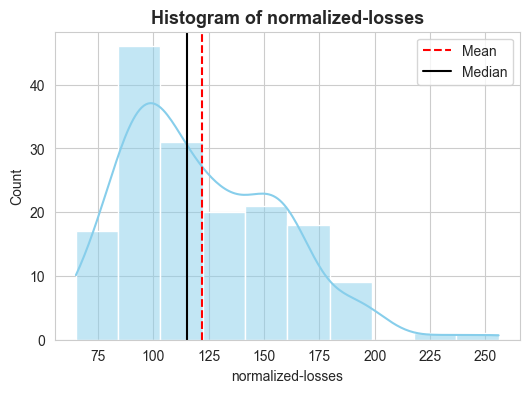

In [113]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='normalized-losses', color='skyblue', kde=True)
plt.axvline(df['normalized-losses'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized-losses'].median(), color='black', label='Median')
plt.title('Histogram of normalized-losses', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is lower than mean, hence it is better to fill the null values with median.

In [114]:
median = df['normalized-losses'].median()
median

np.float64(115.0)

In [115]:
# Filling the missing values
df['normalized-losses'].fillna(median, inplace=True)

In [116]:
df['normalized-losses'].isna().sum()

np.int64(0)

### For num-of-doors Feature
- 2 missing values in this feature

In [117]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

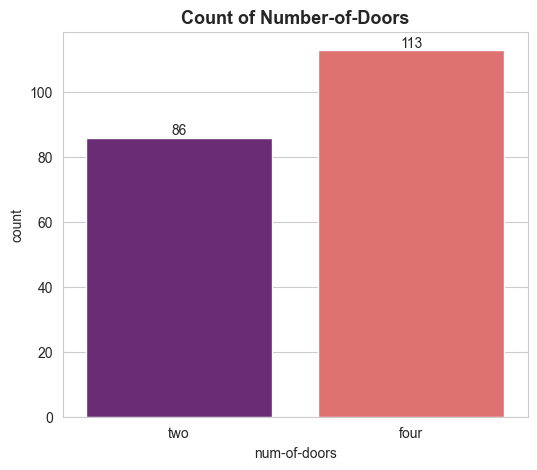

In [118]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='num-of-doors', palette='magma')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Count of Number-of-Doors', fontsize=13, fontweight='bold')
plt.show()

`Four` doors are more frequent than `Two` in this dataset. That is why, it would be better to fill the missing values with `Four`. 

In [119]:
most_freq = df['num-of-doors'].mode()[0]
most_freq

'four'

In [120]:
# Filling the missing values
df['num-of-doors'].fillna(most_freq, inplace=True)

In [121]:
df['num-of-doors'].isna().sum()

np.int64(0)

### For bore Feature
- 4 missing values in this feature

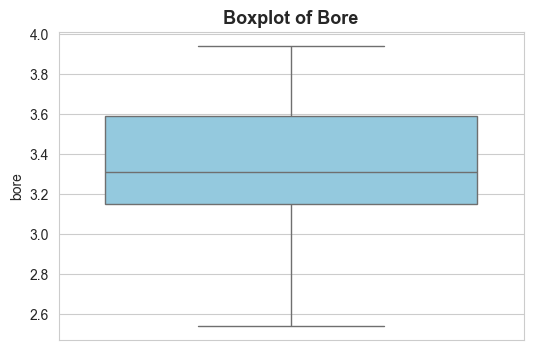

In [122]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='bore', color='skyblue')
plt.title('Boxplot of Bore', fontsize=13, fontweight='bold')
plt.show()

There is not outlier in this feature, hence missing values can be filled by its mean.

In [123]:
mean = df['bore'].mean()
mean

np.float64(3.330710659898477)

In [124]:
# Filling the missing values
df['bore'].fillna(mean, inplace=True)

In [125]:
df['bore'].isna().sum()

np.int64(0)

### For stroke Feature
- 4 missing values in this feature

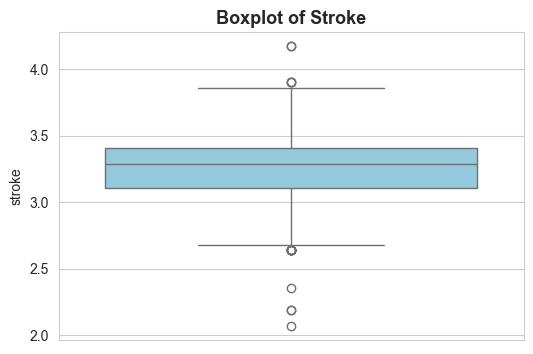

In [126]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='stroke', color='skyblue')
plt.title('Boxplot of Stroke', fontsize=13, fontweight='bold')
plt.show()

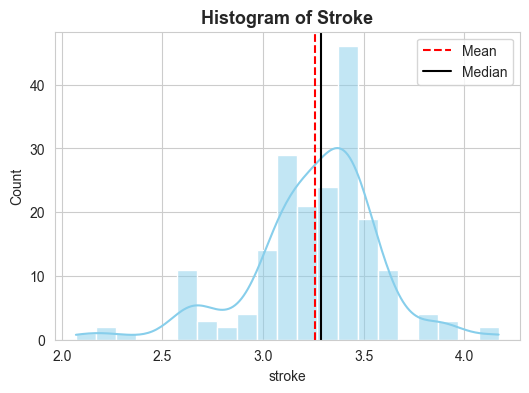

In [127]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='stroke', color='skyblue', kde=True)
plt.axvline(df['stroke'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['stroke'].median(), color='black', label='Median')
plt.title('Histogram of Stroke', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is higher than mean, hence it is better to fill the null values with median.

In [128]:
median = df['stroke'].median()
median

np.float64(3.29)

In [129]:
# Filling the missing values
df['stroke'].fillna(median, inplace=True)

In [130]:
df['stroke'].isna().sum()

np.int64(0)

### For horsepower Feature
- 2 missing values in this feature

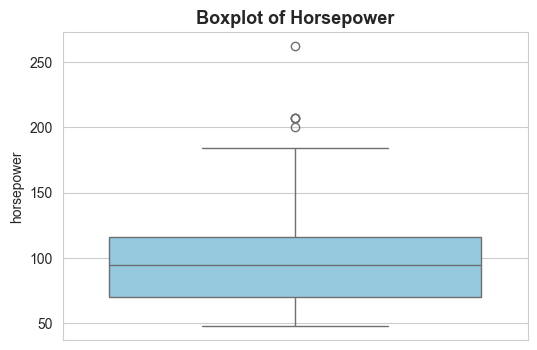

In [131]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='horsepower', color='skyblue')
plt.title('Boxplot of Horsepower', fontsize=13, fontweight='bold')
plt.show()

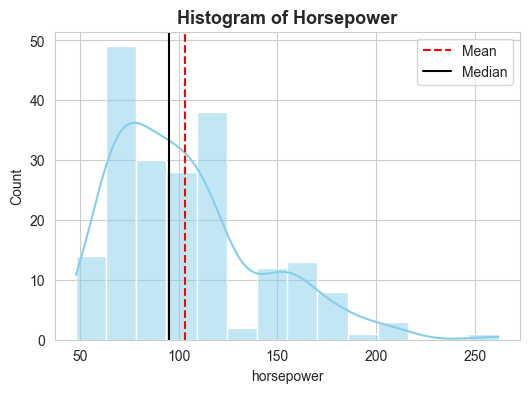

In [132]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='horsepower', color='skyblue', kde=True)
plt.axvline(df['horsepower'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['horsepower'].median(), color='black', label='Median')
plt.title('Histogram of Horsepower', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is lower than mean, hence it is better to fill the null values with median.

In [133]:
median = df['horsepower'].median()
median

np.float64(95.0)

In [134]:
# Filling the missing values
df['horsepower'].fillna(median, inplace=True)

In [135]:
df['horsepower'].isna().sum()

np.int64(0)

### For peak-rpm Feature
- 2 missing values in this feature

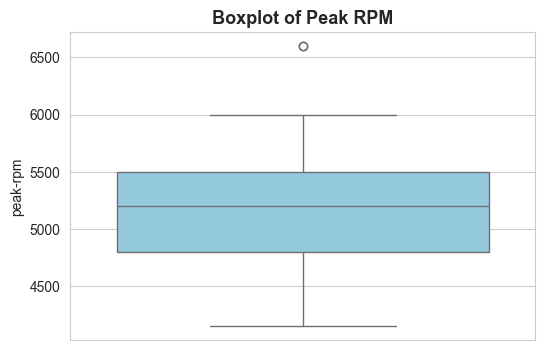

In [136]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='peak-rpm', color='skyblue')
plt.title('Boxplot of Peak RPM', fontsize=13, fontweight='bold')
plt.show()

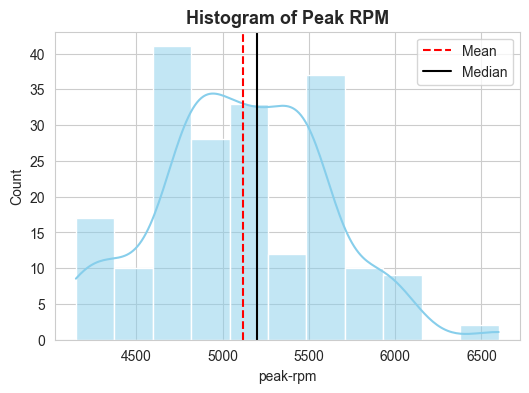

In [137]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='peak-rpm', color='skyblue', kde=True)
plt.axvline(df['peak-rpm'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['peak-rpm'].median(), color='black', label='Median')
plt.title('Histogram of Peak RPM', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is higher than mean, hence it is better to fill the null values with median.

In [138]:
median = df['peak-rpm'].median()
median

np.float64(5200.0)

In [139]:
# Filling the missing values
df['peak-rpm'].fillna(median, inplace=True)

In [140]:
df['peak-rpm'].isna().sum()

np.int64(0)

⭐ **Conclusions:**
- Total 51 missing values were in this dataset.
- 37 null values of `normalized-losses` feature was filled with its median.
- 2 null values of `num-of-doors` feature was filled with its mode.
- 4 null values of `bore` feature was filled with its mean.
- 4 null values of `stroke` feature was filled with its median.
- 2 null values of `horsepower` feature was filled with its median.
- 2 null values of `peak-rpm` feature was filled with its median.

# EDA

## Categorical features

- There are 10 categorical features in this dataset.

In [141]:
cat_cols.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### For `make` features

In [142]:
len(df['make'].unique())

22

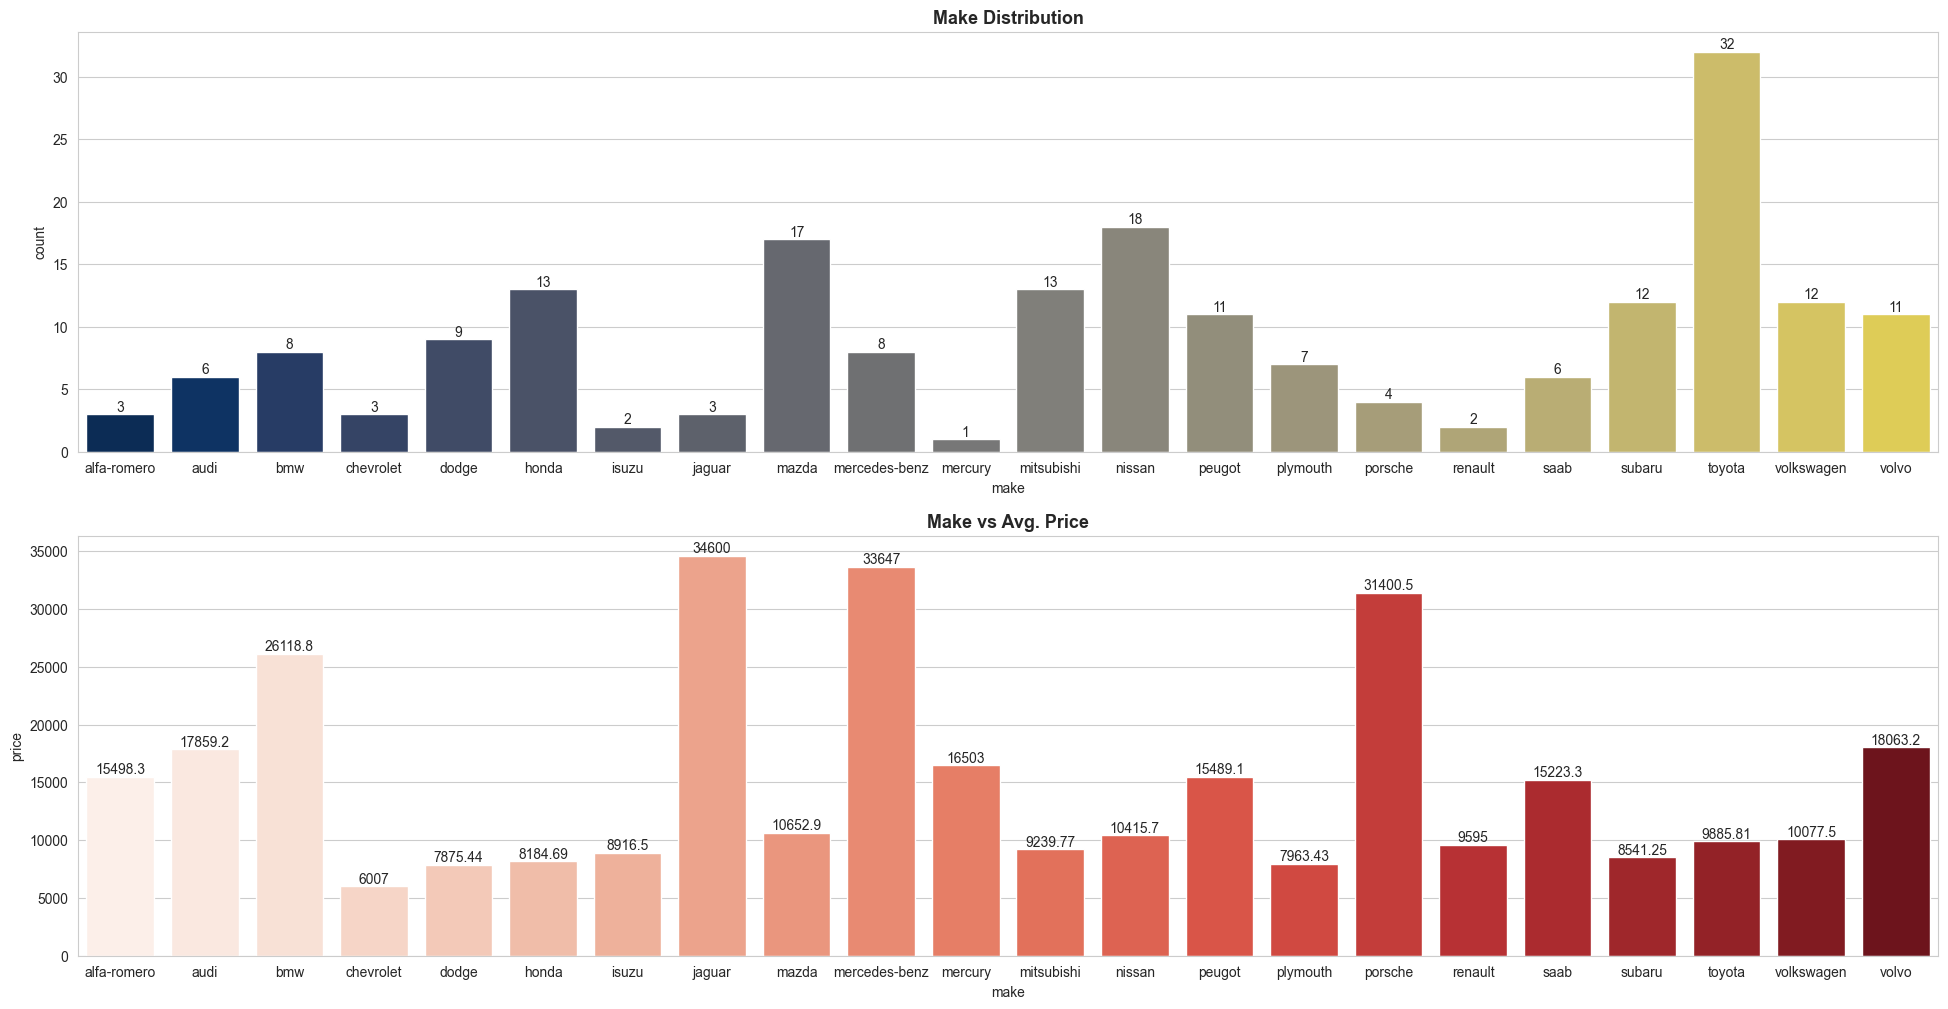

In [143]:
plt.figure(figsize=(24, 12))

plt.subplot(211)
ax = sns.countplot(data=df, x='make', palette='cividis')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Make Distribution', fontsize=13, fontweight='bold')

plt.subplot(212)
ax = sns.barplot(data=df, x='make', y='price', palette='Reds', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Make vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 22 categories
- Price highly depends on this feature.
- Binary Encoding is suitable for this feature.

### For `fuel-type` features

In [144]:
len(df['fuel-type'].unique())

2

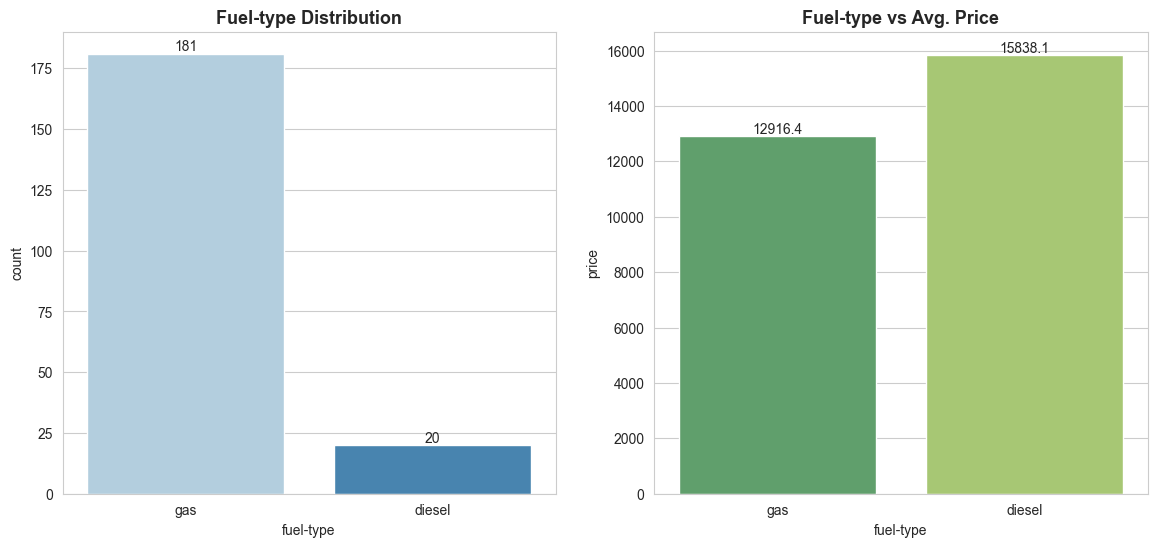

In [145]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='fuel-type', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-type Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='fuel-type', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-type vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `aspiration` features

In [146]:
len(df['aspiration'].unique())

2

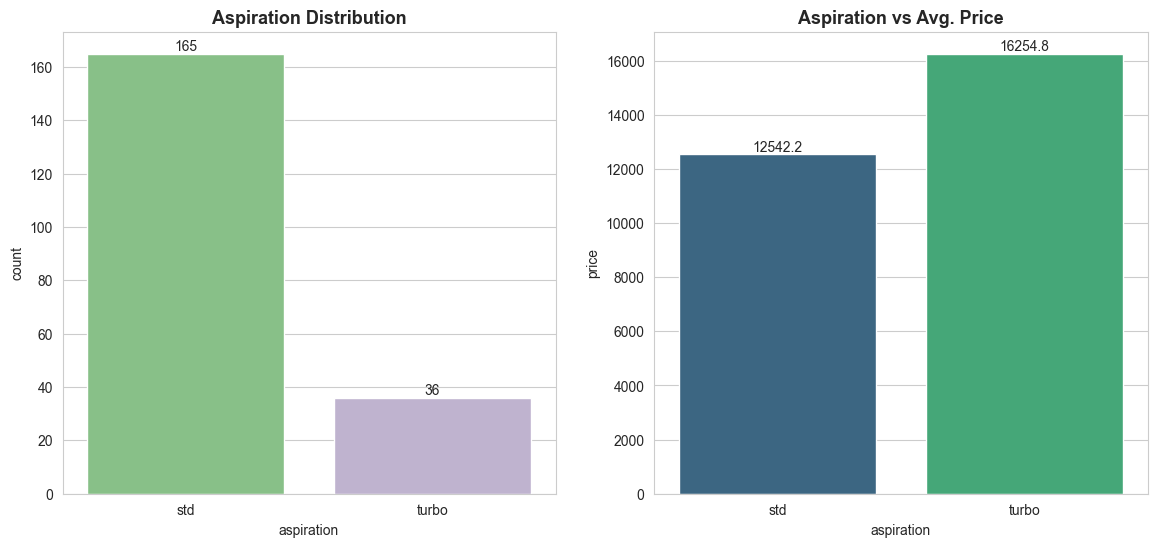

In [147]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='aspiration', palette='Accent')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Aspiration Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='aspiration', y='price', palette='viridis', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Aspiration vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `num-of-doors` features

In [148]:
len(df['num-of-doors'].unique())

2

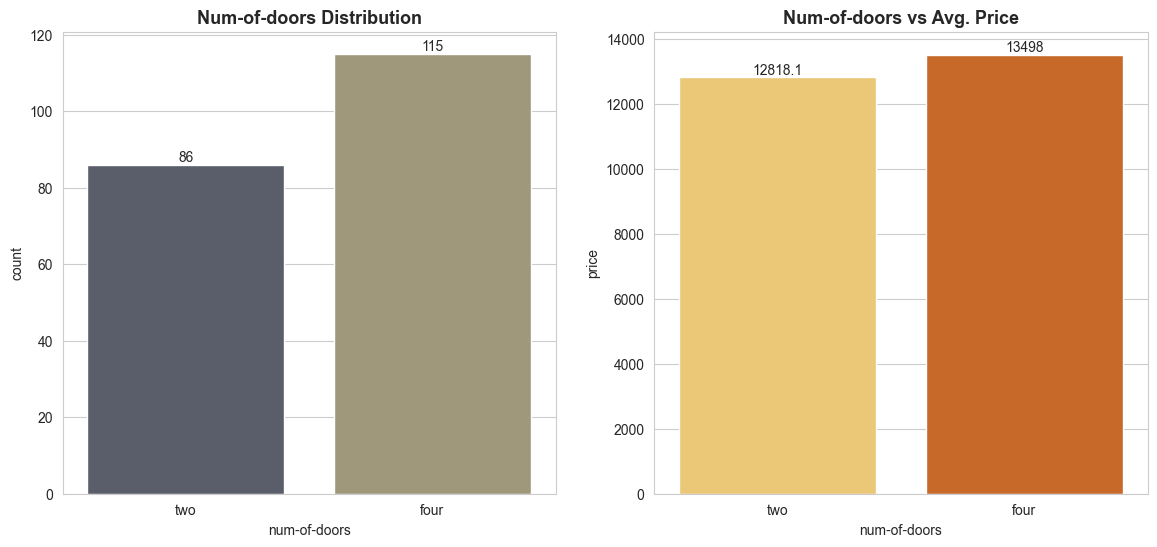

In [149]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='num-of-doors', palette='cividis')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-doors Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='num-of-doors', y='price', palette='YlOrBr', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-doors vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price slightly depends on this feature.
- This feature is skipable.
- One-Hot Encoding is suitable for this feature.

### For `body-style` features

In [150]:
len(df['body-style'].unique())

5

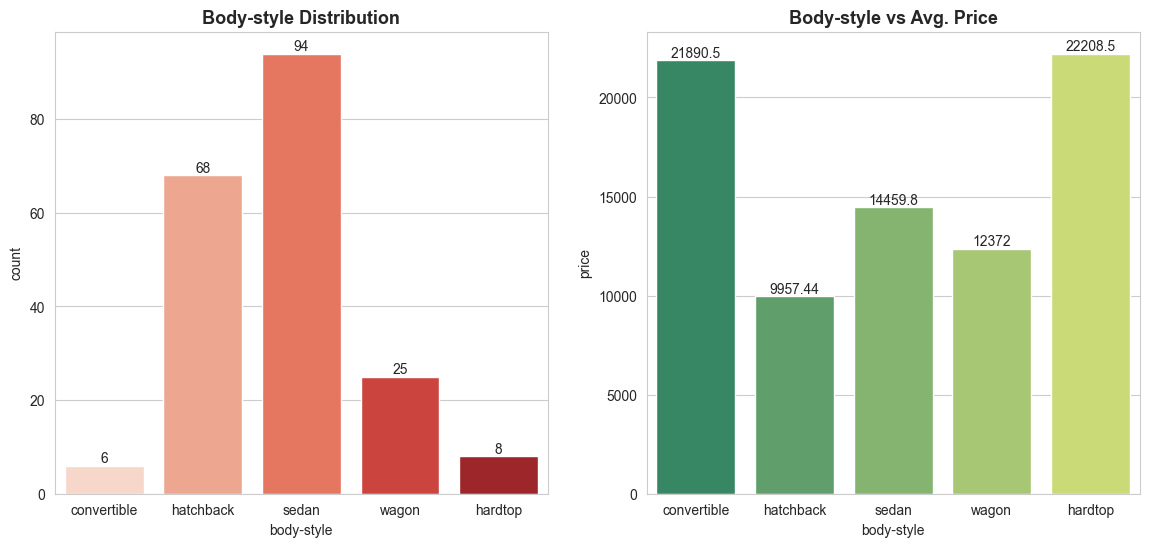

In [151]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='body-style', palette='Reds')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Body-style Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='body-style', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Body-style vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 5 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `drive-wheels` features

In [152]:
len(df['drive-wheels'].unique())

3

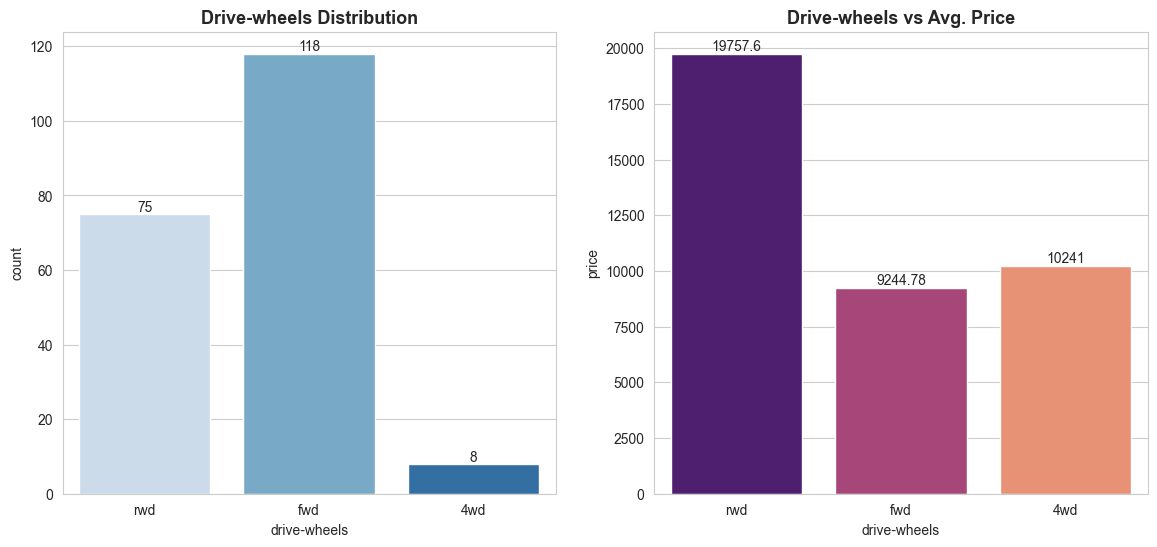

In [153]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='drive-wheels', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Drive-wheels Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='drive-wheels', y='price', palette='magma', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Drive-wheels vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 3 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `engine-location` features

In [154]:
len(df['engine-location'].unique())

2

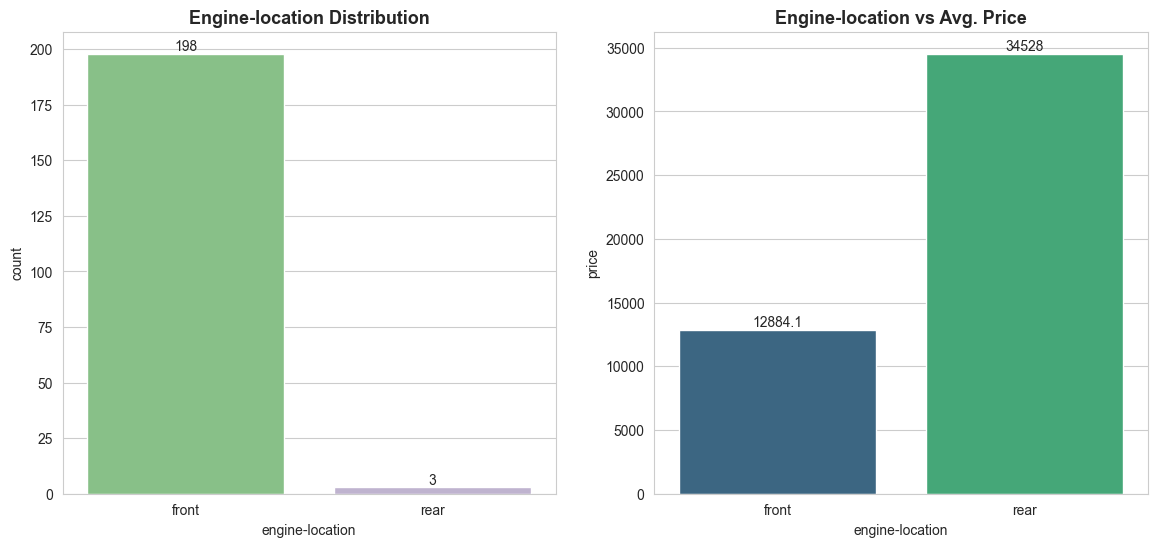

In [155]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='engine-location', palette='Accent')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-location Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='engine-location', y='price', palette='viridis', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-location vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `engine-type` features

In [156]:
len(df['engine-type'].unique())

6

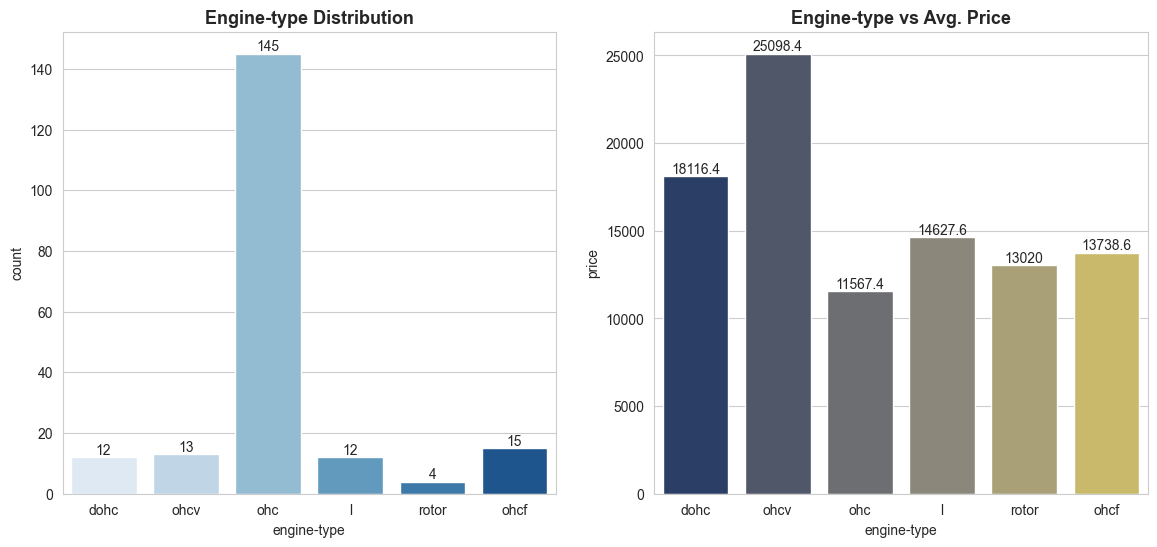

In [157]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='engine-type', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-type Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='engine-type', y='price', palette='cividis', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-type vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 6 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `num-of-cylinders` features

In [158]:
len(df['num-of-cylinders'].unique())

7

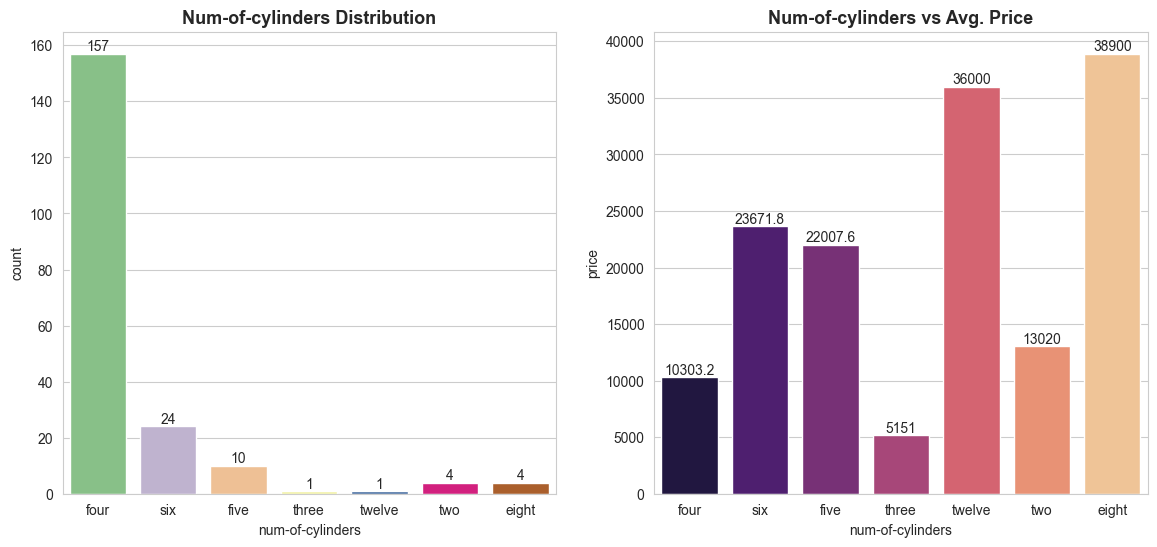

In [159]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='num-of-cylinders', palette='Accent')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-cylinders Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='num-of-cylinders', y='price', palette='magma', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-cylinders vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 7 categories
- Price highly depends on this feature.
- Mapping with respective numerical value is suitable for this feature.

### For `fuel-system` features

In [160]:
len(df['fuel-system'].unique())

8

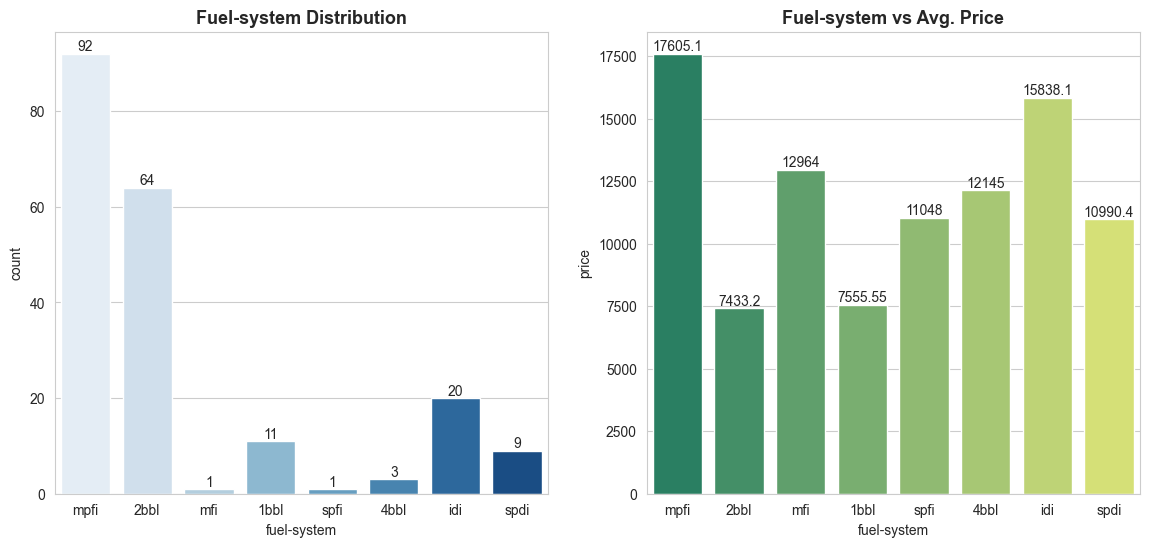

In [161]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='fuel-system', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-system Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='fuel-system', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-system vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 7 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.


⭐ **Selected Categorical Features:**
- make
- fuel-type
- aspiration
- body-style
- drive-wheels
- engine-location
- engine-type
- num-of-cylinders
- fuel-system

## Numerical features

- There are 16 categorical features in this dataset.

In [162]:
num_cols.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

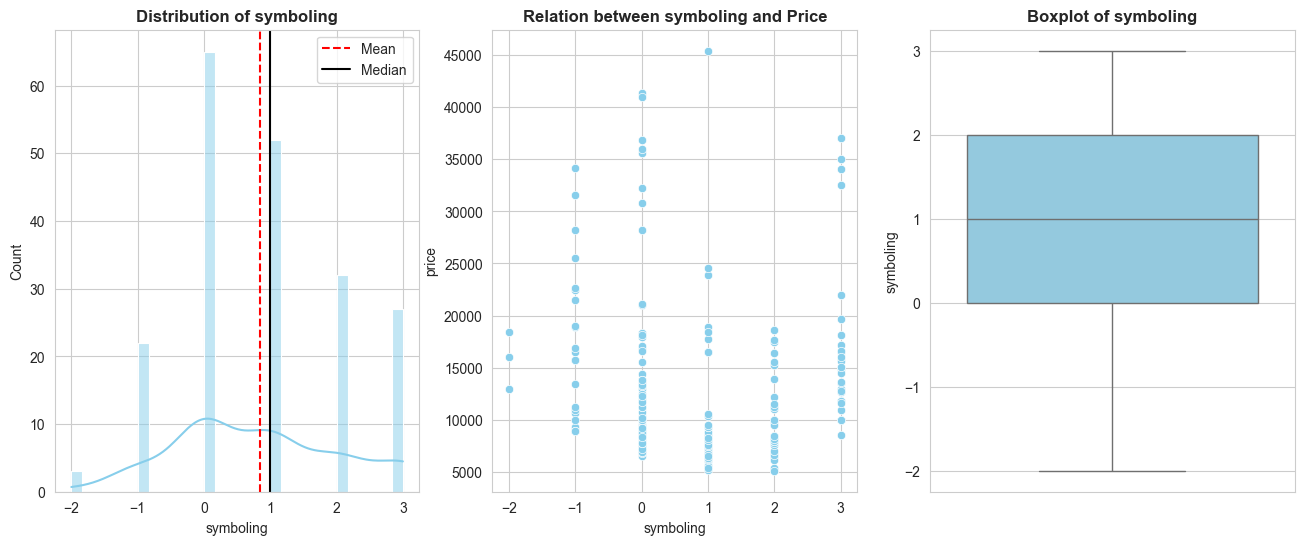

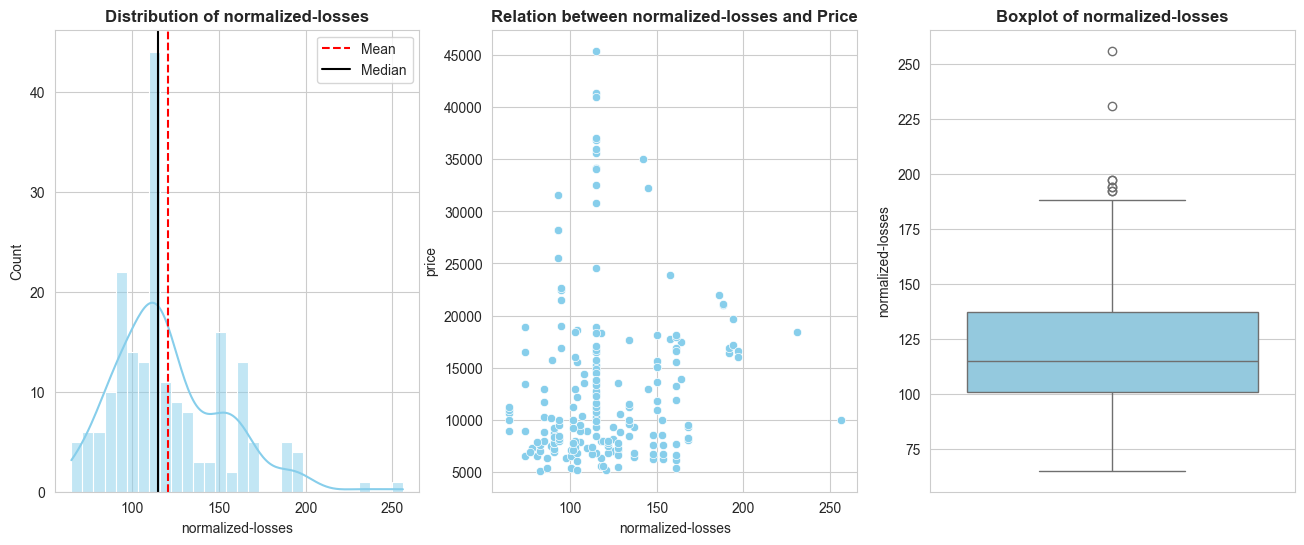

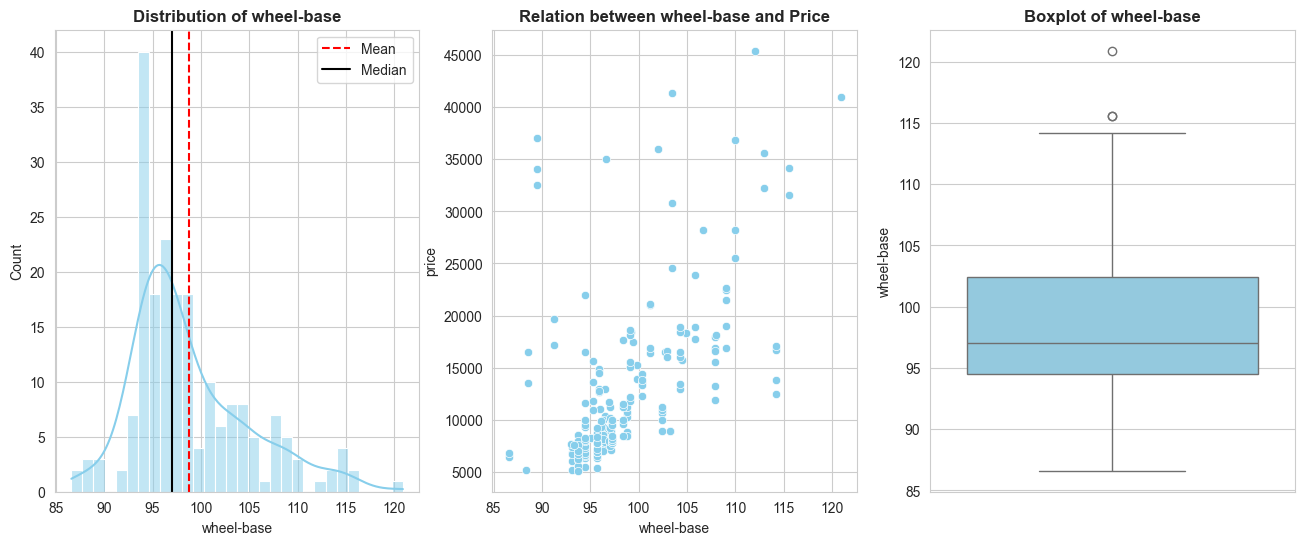

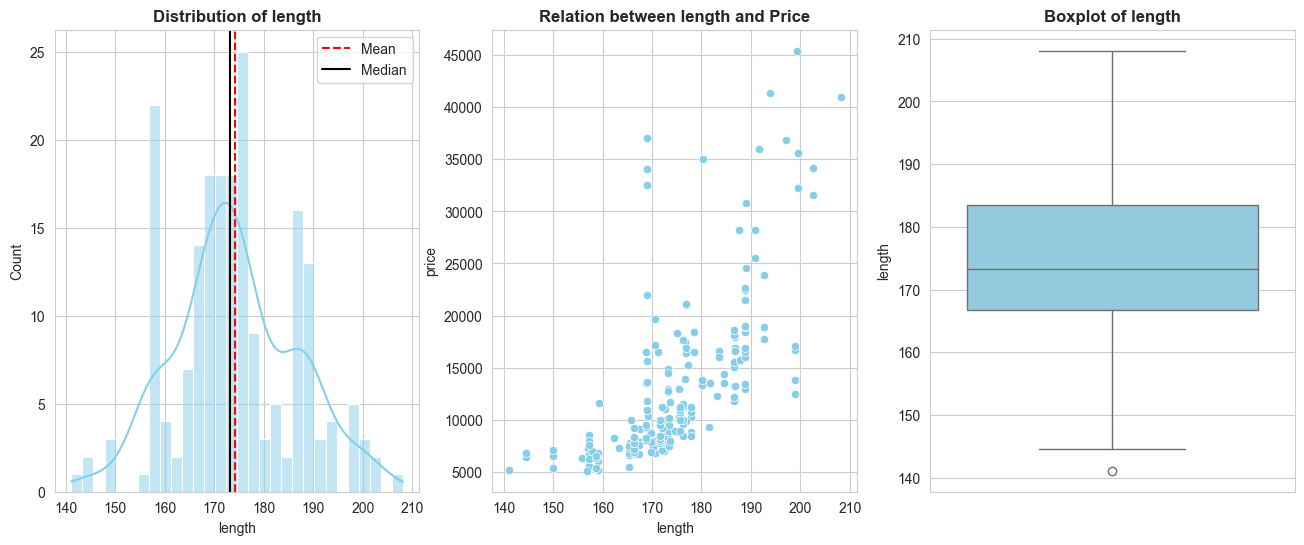

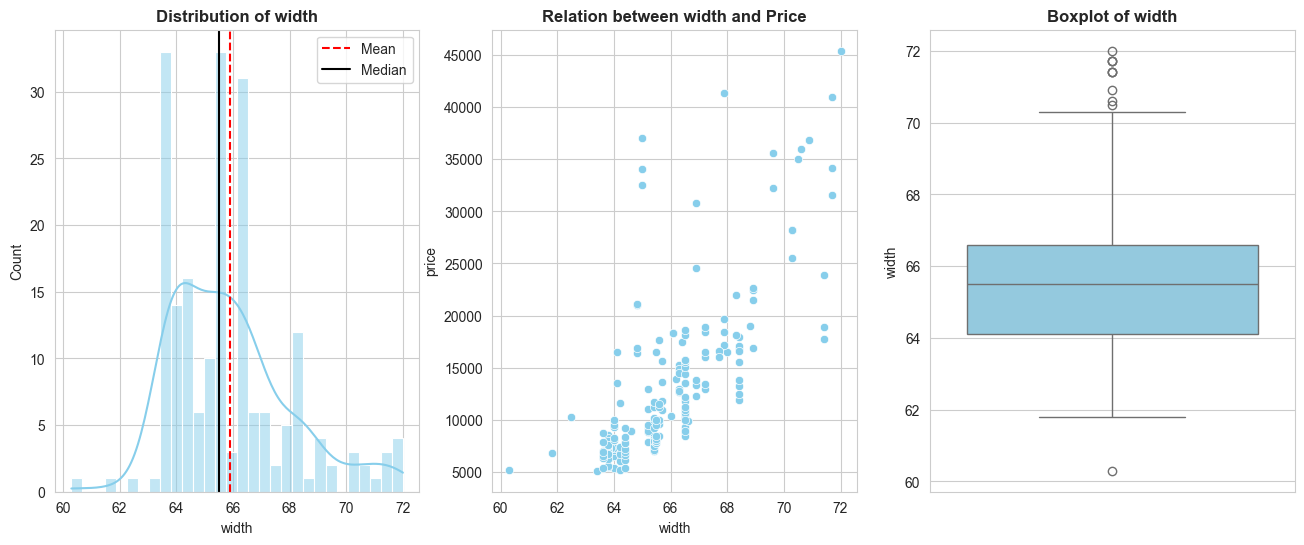

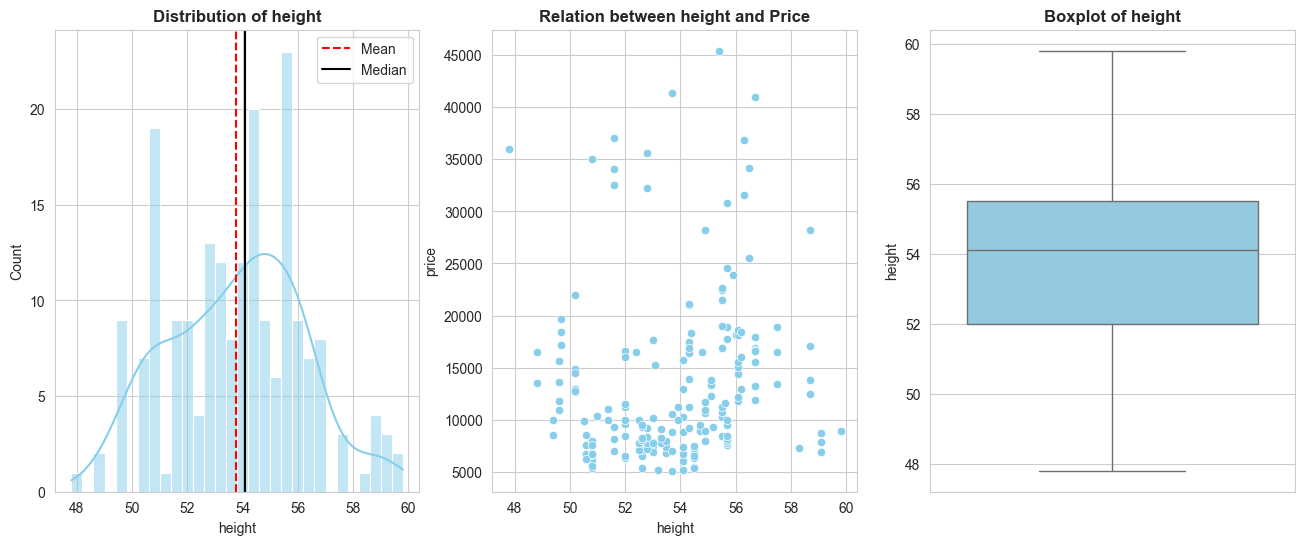

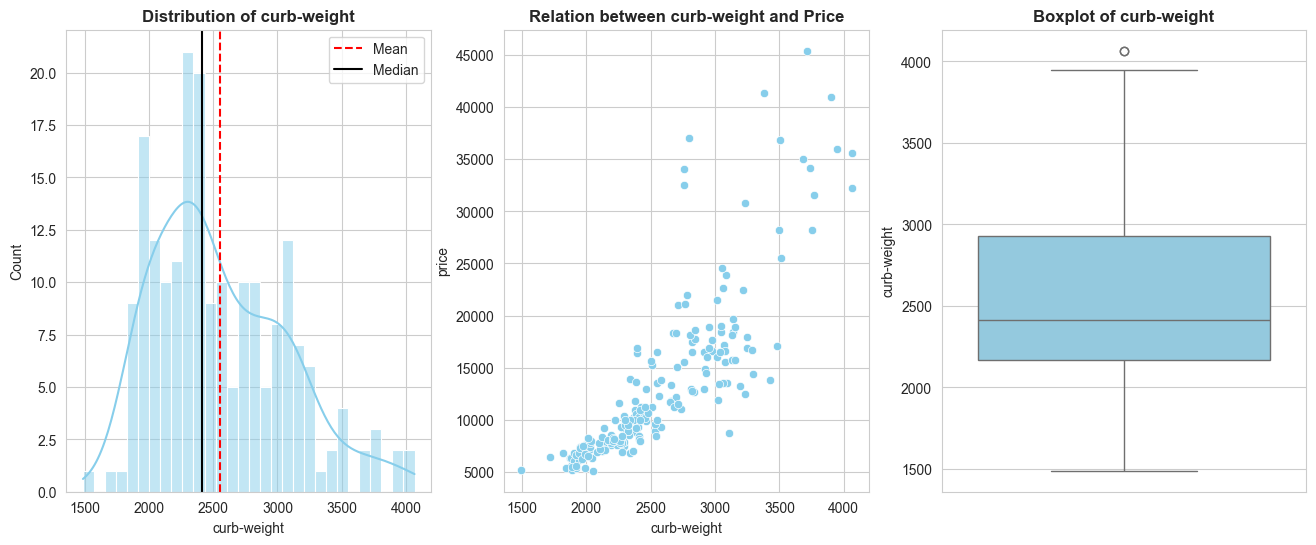

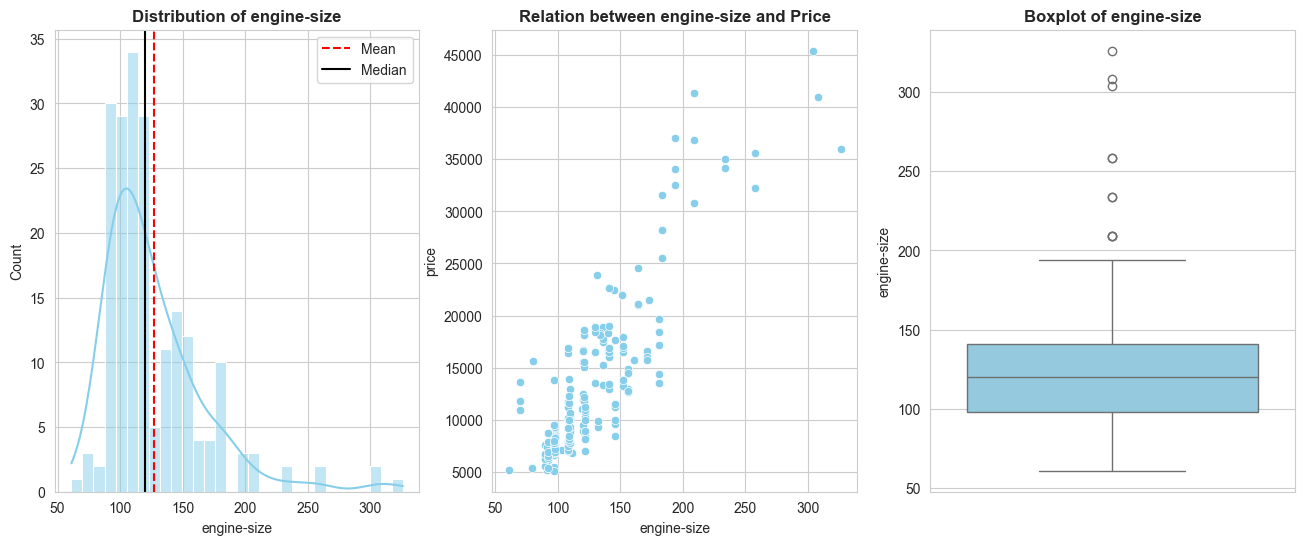

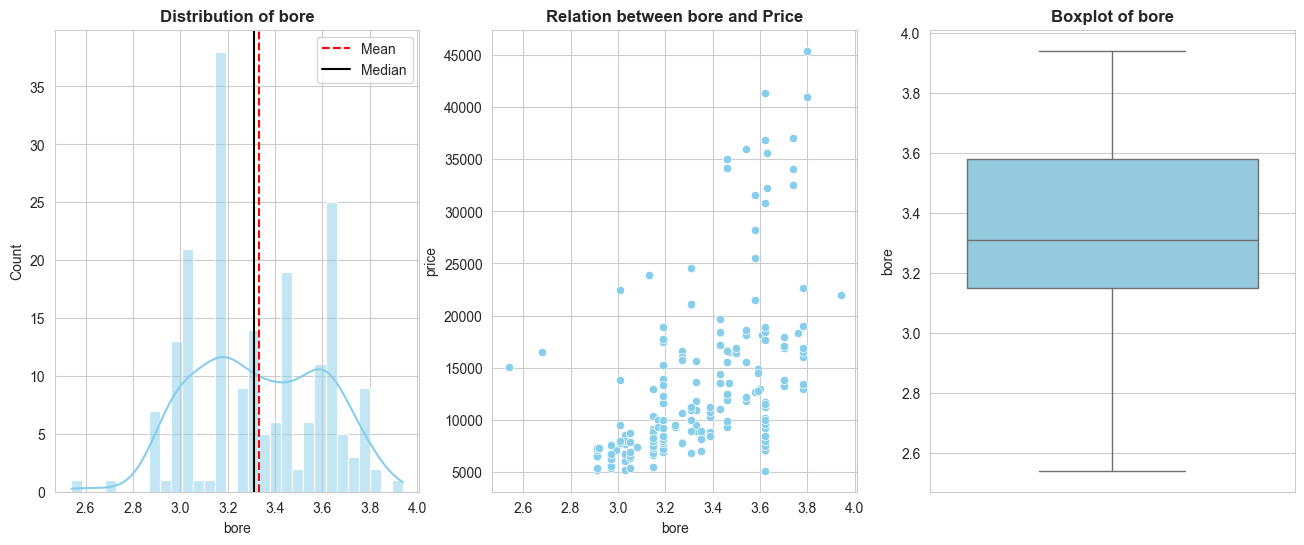

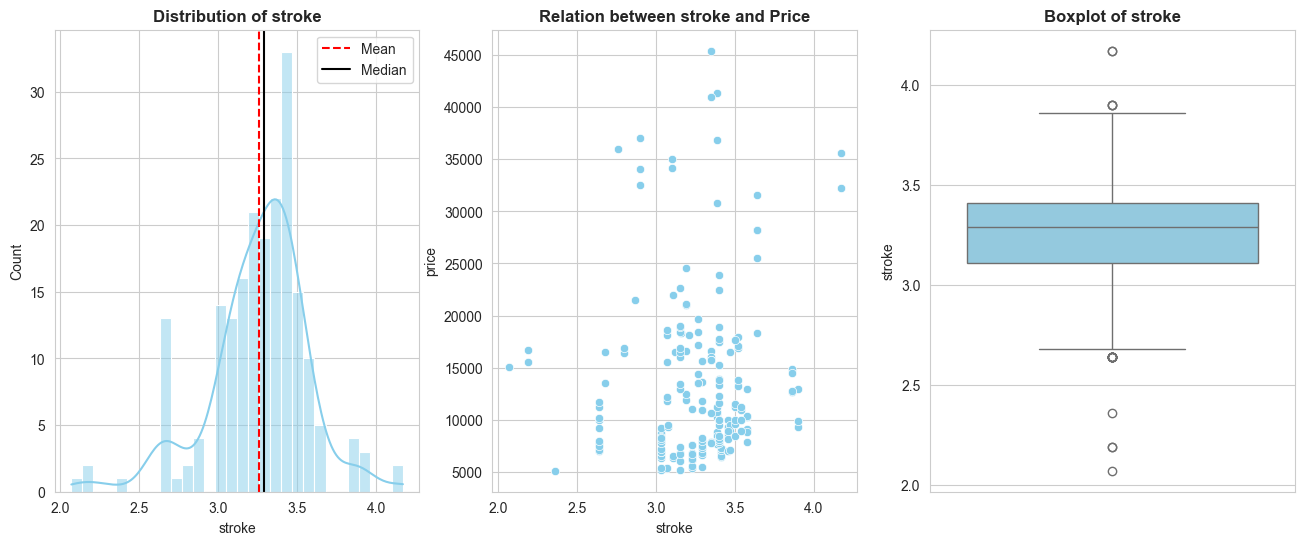

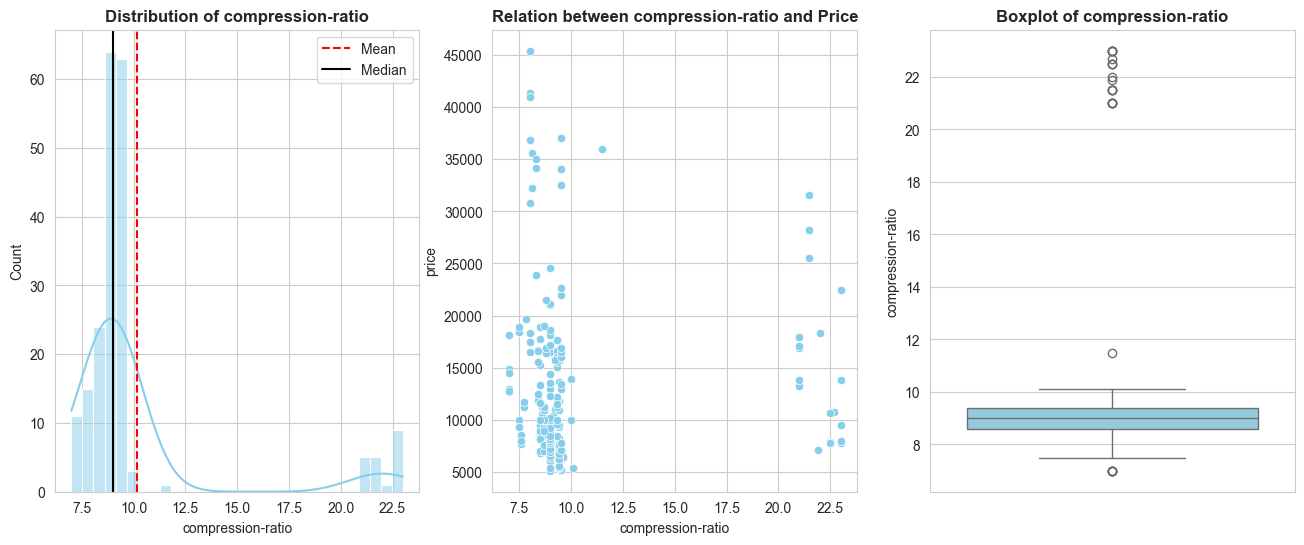

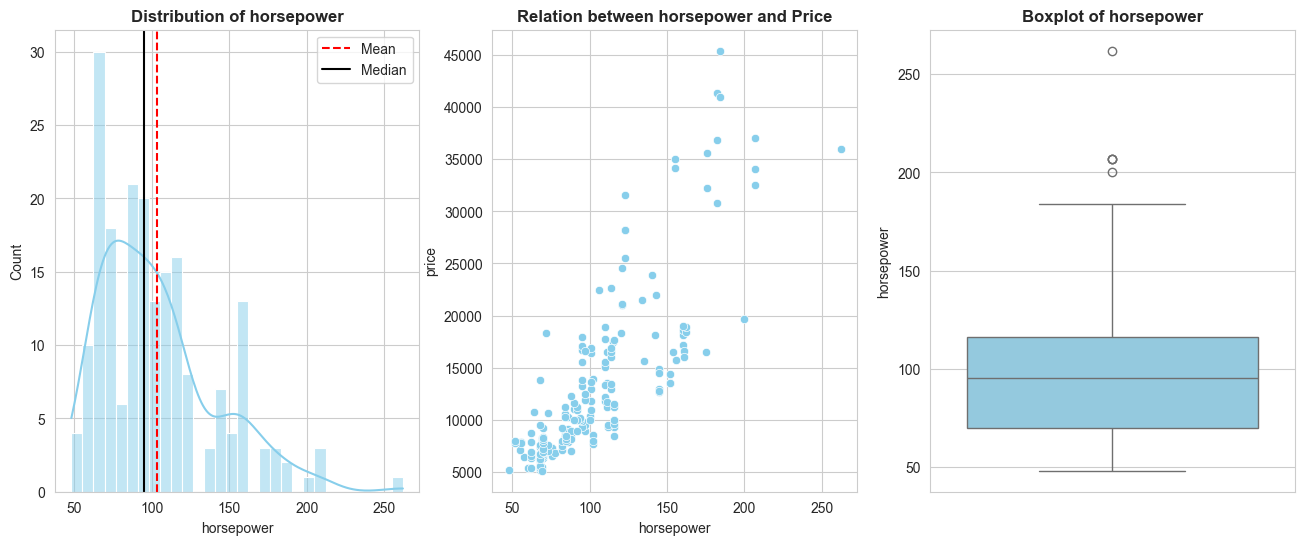

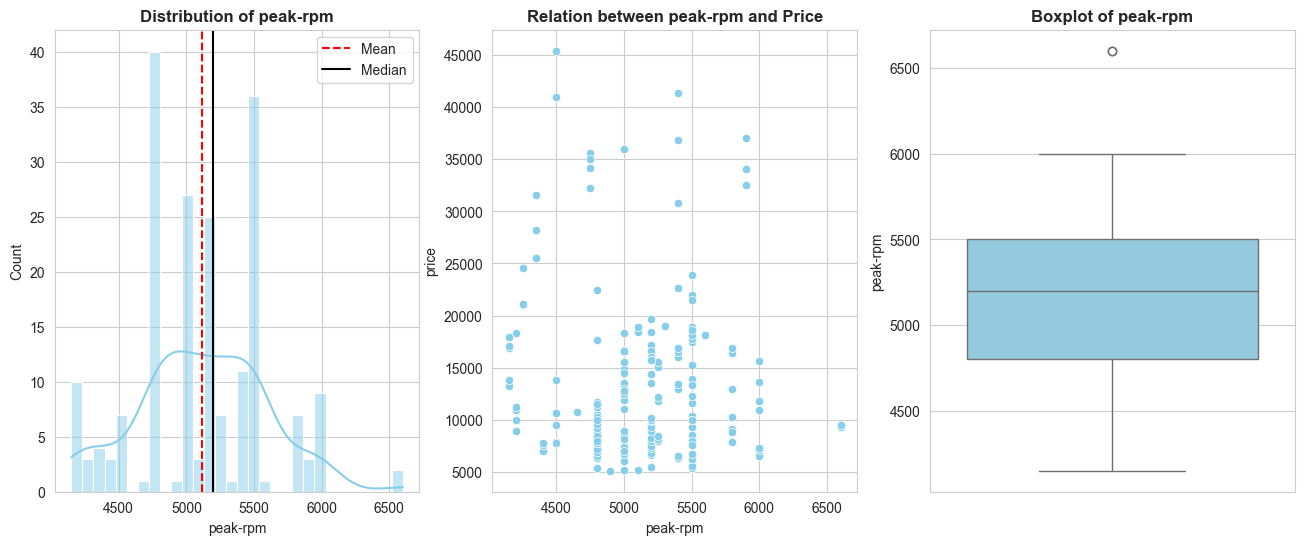

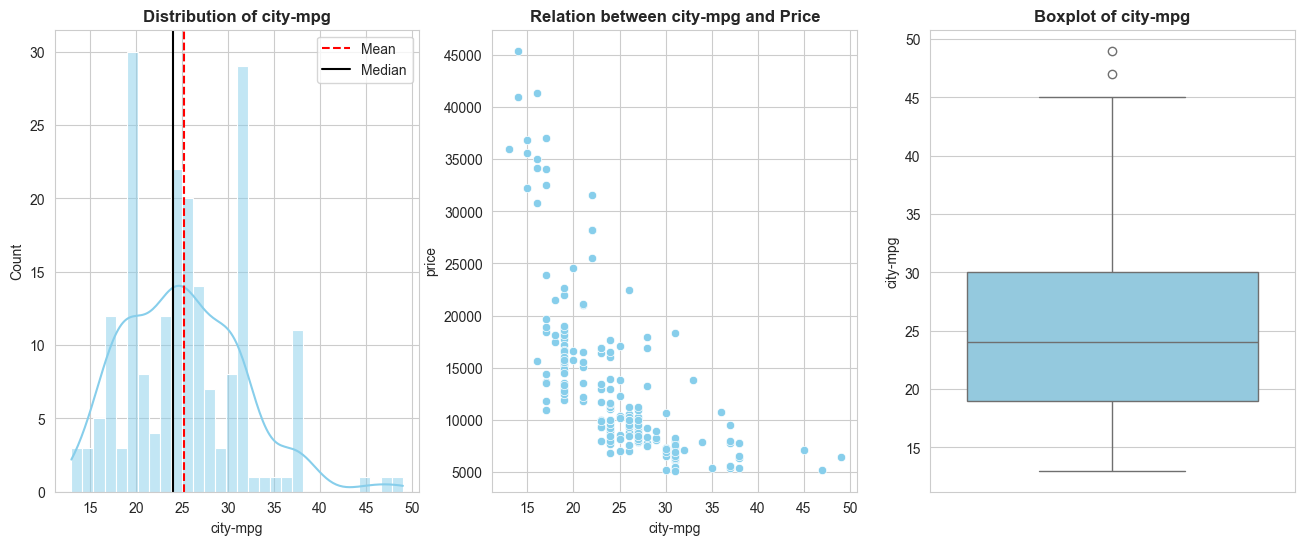

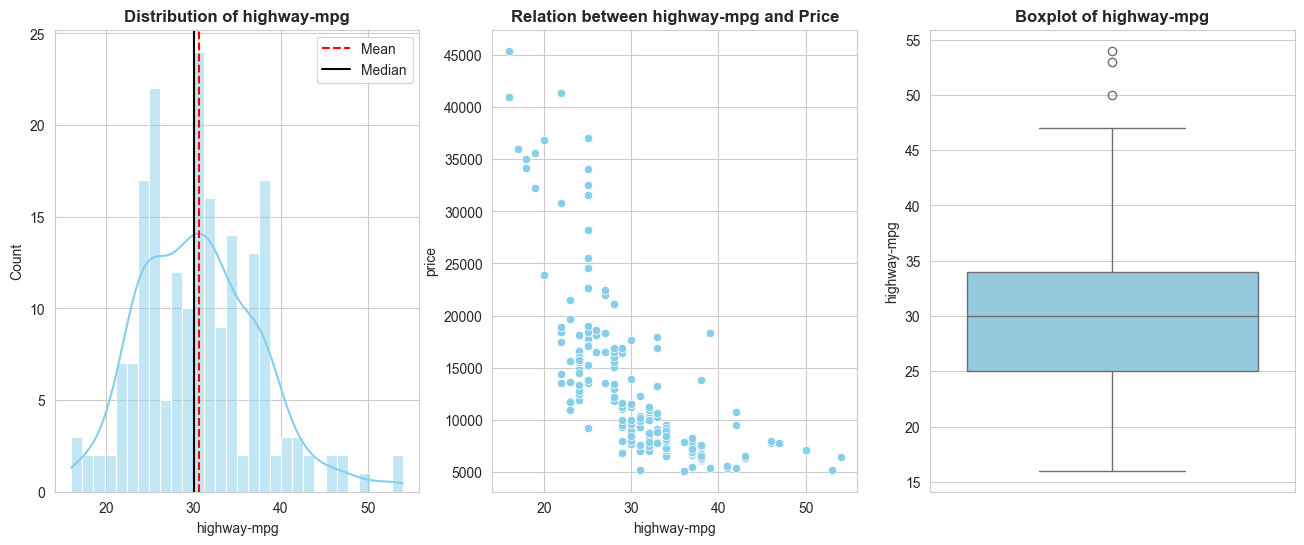

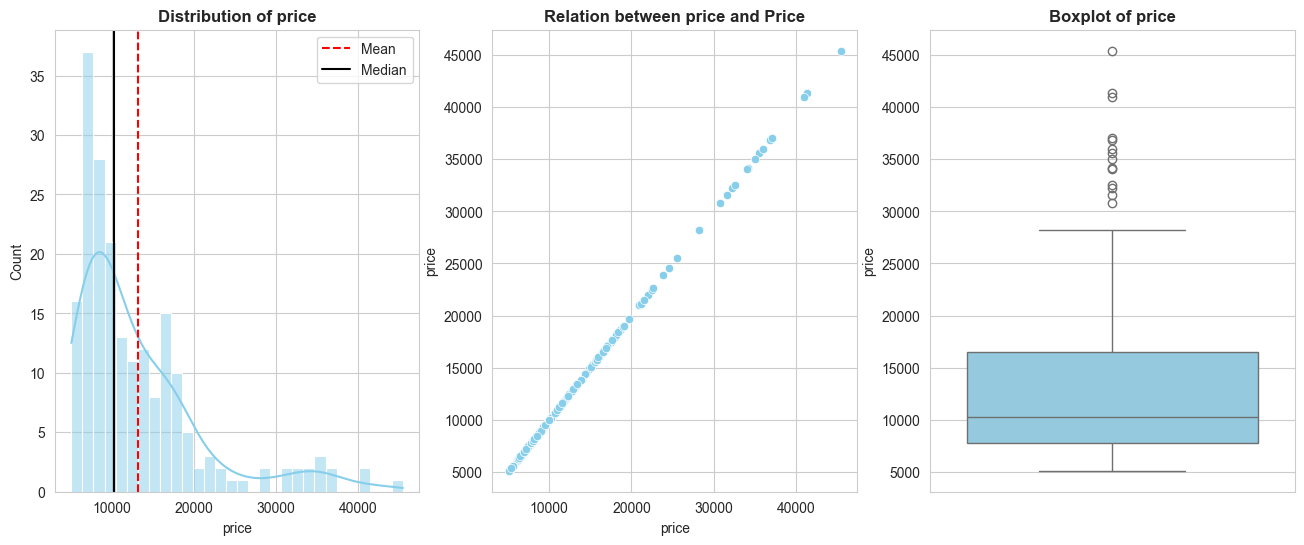

In [163]:
for col in num_cols.columns:
    plt.figure(figsize=(16, 6))
    
    plt.subplot(131)
    sns.histplot(data=df, x=col, bins=30, color='skyblue', kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), c='black', label='Median')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.legend()

    plt.subplot(132)
    sns.scatterplot(data=df, x=col, y='price', color='skyblue')
    plt.title(f'Relation between {col} and Price', fontsize=12, fontweight='bold')

    plt.subplot(133)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')

    plt.show()

In [164]:
# Correlation between numerical features

corr = df.corr(numeric_only=True)
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.050688,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335
bore,-0.139896,-0.050688,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055384,0.001250,0.565613,-0.266468,-0.582121,-0.591390,0.543154
stroke,-0.004387,0.046024,0.156740,0.123016,0.188605,-0.064380,0.166809,0.203043,-0.055384,1.000000,0.187434,0.093555,-0.056336,-0.036823,-0.037100,0.082209


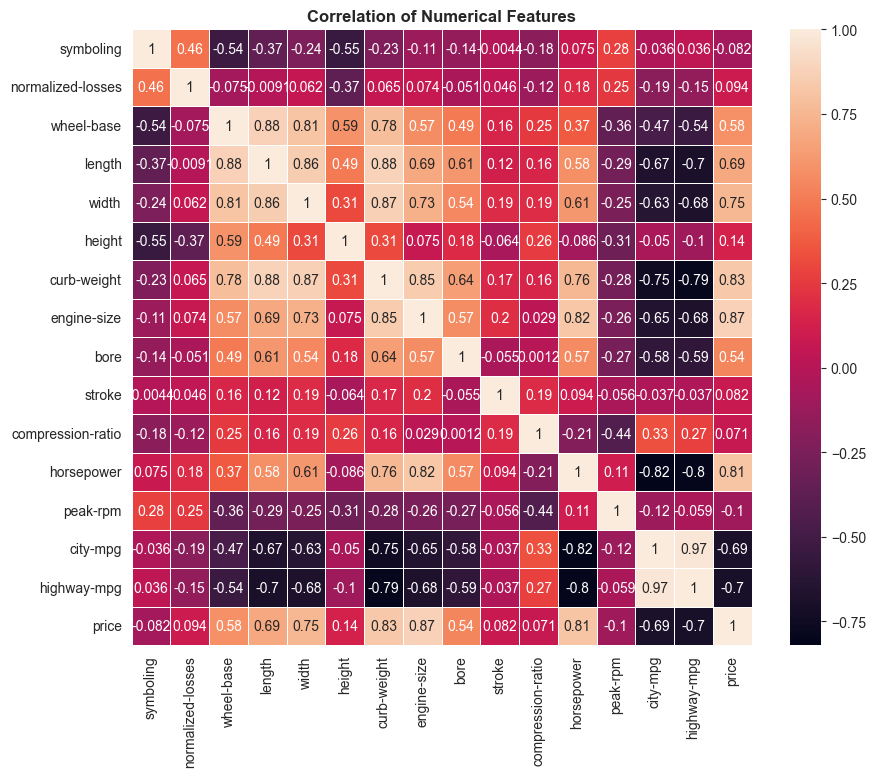

In [165]:
# Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation of Numerical Features', fontsize=12, fontweight='bold')
plt.show()

⭐ **Conclusions:**
- There are outliers in few features.
- Not all features are correlated with price.
- We need to select features for regression training and handle the outliers of the selected features.

⭐ **Selected Numerical Features:**
- wheel-base
- length
- width
- curb-weight
- engine-size
- bore
- horsepower
- city-mpg
- highway-mpg

# Feature Engineering

In [166]:
# Keeping the original dataset intact
processed_df = df.copy()

## Encoding categorical features

In [167]:
selected_cat_cols = pd.Series(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])
selected_cat_cols

0                make
1           fuel-type
2          aspiration
3          body-style
4        drive-wheels
5     engine-location
6         engine-type
7    num-of-cylinders
8         fuel-system
dtype: object

In [168]:
# Encoding 'make' feature with Binary Encoder

from category_encoders import BinaryEncoder
BinEn = BinaryEncoder(cols=['make'])
BinEn

,verbose,0
,cols,['make']
,mapping,None
,drop_invariant,False
,return_df,True
,base,2
,handle_unknown,'value'
,handle_missing,'value'


In [169]:
processed_df = BinEn.fit_transform(processed_df)
processed_df.head()

,symboling,normalized-losses,make_0,make_1,make_2,make_3,make_4,fuel-type,aspiration,num-of-doors,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,0,0,0,1,gas,std,two,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,0,0,0,1,gas,std,two,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,0,0,0,0,1,gas,std,two,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,0,0,0,1,0,gas,std,four,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,0,0,0,1,0,gas,std,four,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [170]:
# Encoding 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system' feature with One-Hot Encoder

from sklearn.preprocessing import OneHotEncoder
HotEn = OneHotEncoder(drop='first', sparse_output=False)
HotEn

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [171]:
encoded = HotEn.fit_transform(processed_df[['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']])

In [172]:
encoded_df = pd.DataFrame(encoded, columns=HotEn.get_feature_names_out())
encoded_df

,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [173]:
processed_df = pd.concat([processed_df, encoded_df], axis=1)

In [174]:
processed_df.drop(['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis=1, inplace=True)

In [175]:
processed_df.head()

,symboling,normalized-losses,make_0,make_1,make_2,make_3,make_4,num-of-doors,wheel-base,length,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,0,0,0,0,1,two,88.6,168.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,115.0,0,0,0,0,1,two,88.6,168.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,115.0,0,0,0,0,1,two,94.5,171.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164.0,0,0,0,1,0,four,99.8,176.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164.0,0,0,0,1,0,four,99.4,176.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [176]:
# Encoding 'num-of-cylinders' with Mapping
processed_df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [177]:
cylinder_map = {
    'two' : 2,
    'three' : 3,
    'four' : 4,
    'five' : 5,
    'six' : 6,
    'eight' : 8,
    'twelve' : 12
}

processed_df['num-of-cylinders'] = processed_df['num-of-cylinders'].map(cylinder_map)
processed_df['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
196    4
197    4
198    6
199    6
200    4
Name: num-of-cylinders, Length: 201, dtype: int64

⭐ **Conclusions:**
- Encoded 'make' feature with BinaryEncoder.
- Transform 'num-of-cylinders' feature with mapping.
- Encoded 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', and 'fuel-system' features with One-Hot Encoder.

## Outliers Handling of Numerical Features

In [178]:
selected_num_cols = pd.Series(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg'])
selected_num_cols

0     wheel-base
1         length
2          width
3    curb-weight
4    engine-size
5           bore
6     horsepower
7       city-mpg
8    highway-mpg
dtype: object

In [179]:
# Outlier of feature

def detect_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in selected_num_cols:
    print(f'Outlier of {col}:\n{detect_outlier(processed_df[col])}\n')

Outlier of wheel-base:
67    115.6
68    115.6
70    120.9
Name: wheel-base, dtype: float64

Outlier of length:
17    141.1
Name: length, dtype: float64

Outlier of width:
6     71.4
7     71.4
8     71.4
16    70.9
17    60.3
46    70.6
67    71.7
68    71.7
69    70.5
70    71.7
71    72.0
Name: width, dtype: float64

Outlier of curb-weight:
44    4066
45    4066
Name: curb-weight, dtype: int64

Outlier of engine-size:
14    209
15    209
16    209
44    258
45    258
46    326
68    234
69    234
70    308
71    304
Name: engine-size, dtype: int64

Outlier of bore:
Series([], Name: bore, dtype: float64)

Outlier of horsepower:
46     262.0
102    200.0
123    207.0
124    207.0
125    207.0
Name: horsepower, dtype: float64

Outlier of city-mpg:
17    47
29    49
Name: city-mpg, dtype: int64

Outlier of highway-mpg:
17    53
29    54
87    50
Name: highway-mpg, dtype: int64



⭐ **Conclusions:**
- Total 38 outliers in these numerical features.
- While some of these outliers are rare, but not unrealistic.
- Hence, no further action is needed.

## Modification of features

In [180]:
corr = processed_df[selected_num_cols].corr()
corr

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
wheel-base,1.000000,0.876024,0.814507,0.782097,0.572027,0.493203,0.372156,-0.470606,-0.543304
length,0.876024,1.000000,0.857170,0.880665,0.685025,0.608941,0.578683,-0.665192,-0.698142
width,0.814507,0.857170,1.000000,0.866201,0.729436,0.544879,0.614146,-0.633531,-0.680635
curb-weight,0.782097,0.880665,0.866201,1.000000,0.849072,0.644041,0.757961,-0.749543,-0.794889
engine-size,0.572027,0.685025,0.729436,0.849072,1.000000,0.572516,0.822167,-0.650546,-0.679571
bore,0.493203,0.608941,0.544879,0.644041,0.572516,1.000000,0.565613,-0.582121,-0.591390
horsepower,0.372156,0.578683,0.614146,0.757961,0.822167,0.565613,1.000000,-0.821171,-0.804490
city-mpg,-0.470606,-0.665192,-0.633531,-0.749543,-0.650546,-0.582121,-0.821171,1.000000,0.972044
highway-mpg,-0.543304,-0.698142,-0.680635,-0.794889,-0.679571,-0.591390,-0.804490,0.972044,1.000000


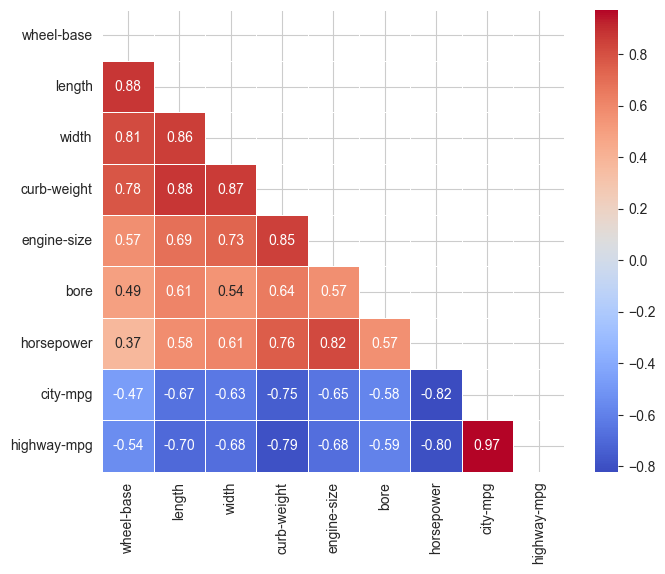

In [181]:
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidth=0.5)
plt.show()


It seems few features are highly related with others. Lets find out, how can we minimize the number of features.

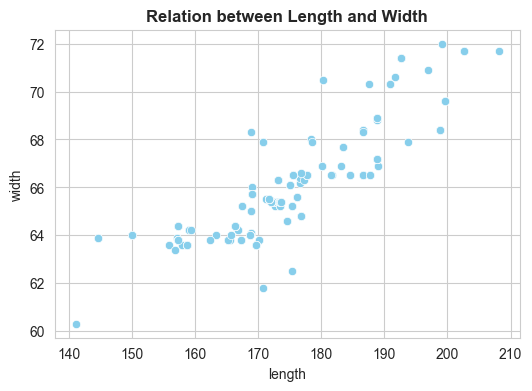

In [182]:
# Length vs Width
plt.figure(figsize=(6, 4))
sns.scatterplot(data=processed_df, x='length', y='width', color='skyblue')
plt.title(f'Relation between Length and Width', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
# Creating 'length_width' feature by multipling 'length' and 'width'

processed_df['legth_width'] = processed_df['length'] * processed_df['width']
processed_df.drop(['length', 'width'], axis=1, inplace=True)

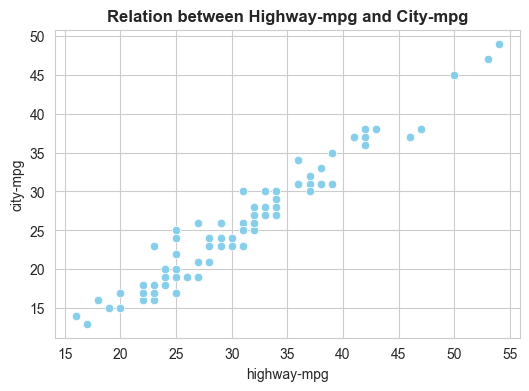

In [184]:
# Highway-mpg vs City-mpg
plt.figure(figsize=(6, 4))
sns.scatterplot(data=processed_df, x='highway-mpg', y='city-mpg', color='skyblue')
plt.title(f'Relation between Highway-mpg and City-mpg', fontsize=12, fontweight='bold')
plt.show()

In [185]:
# Creating 'avg_mpg' feature by taking mean of 'highway-mpg' and 'city-mpg'

processed_df['avg_mpg'] = (processed_df['highway-mpg'] + processed_df['city-mpg']) / 2
processed_df.drop(['highway-mpg', 'city-mpg'], axis=1, inplace=True)

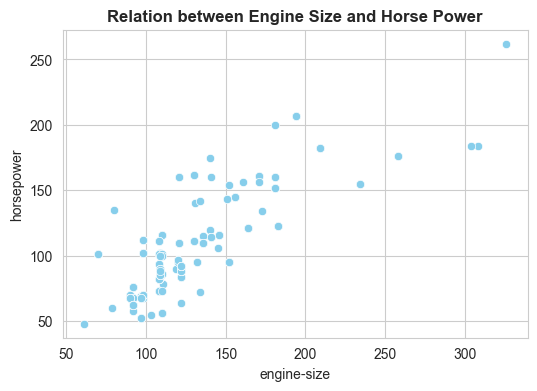

In [186]:
# Engine Size vs Horse Power
plt.figure(figsize=(6, 4))
sns.scatterplot(data=processed_df, x='engine-size', y='horsepower', color='skyblue')
plt.title(f'Relation between Engine Size and Horse Power', fontsize=12, fontweight='bold')
plt.show()


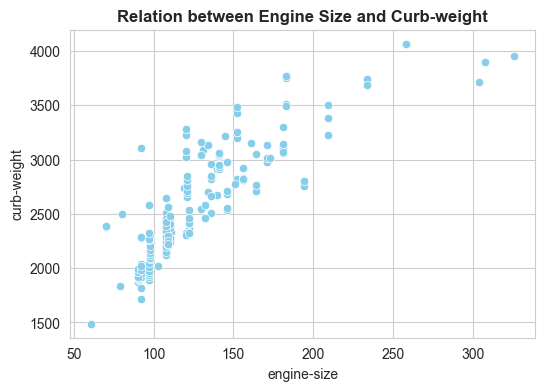

In [187]:
# Engine Size vs Curb-weight
plt.figure(figsize=(6, 4))
sns.scatterplot(data=processed_df, x='engine-size', y='curb-weight', color='skyblue')
plt.title(f'Relation between Engine Size and Curb-weight', fontsize=12, fontweight='bold')
plt.show()

These features are kept unmodified.

⭐ **Conclusions:**
- 'length' and 'width' features are merged into 'length_width' features by multiplying them.
- 'highway-mpg' and 'city-mpg' features are merged into 'avg_mpg' feature by the mean value of these two features.
- Dropped 'length', 'width', 'highway-mpg' and 'city-mpg' features.

## Creating final DataFrame

In [188]:
processed_df.columns

Index(['symboling', 'normalized-losses', 'make_0', 'make_1', 'make_2',
       'make_3', 'make_4', 'num-of-doors', 'wheel-base', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'legth_width', 'avg_mpg'],
      dtype='object')

In [190]:
# creating final dataframe by dropping unwanted features

unwanted_features = ['symboling', 'normalized-losses', 'num-of-doors', 'height', 'stroke', 'compression-ratio', 'peak-rpm']

final_df = processed_df.drop(['symboling', 'normalized-losses', 'num-of-doors', 'height', 'stroke', 'compression-ratio', 'peak-rpm'], axis=1)
final_df.head()

,make_0,make_1,make_2,make_3,make_4,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,legth_width,avg_mpg
0,0,0,0,0,1,88.6,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10820.08,24.0
1,0,0,0,0,1,88.6,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10820.08,24.0
2,0,0,0,0,1,94.5,2823,6,152,2.68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11213.60,22.5
3,0,0,0,1,0,99.8,2337,4,109,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11690.92,27.0
4,0,0,0,1,0,99.4,2824,5,136,3.19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11726.24,20.0


In [191]:
final_df.shape

(201, 35)

In [192]:
final_df.isna().sum().sum()

np.int64(0)

⭐ **Conclusions:**
- Created final dataset by dropping unwanted features.
- Shape of final dataset is (201, 35).
- There is no null value in the final dataset.

# Regression (Training and Testing)

## Data Spliting

In [193]:
final_df.columns

Index(['make_0', 'make_1', 'make_2', 'make_3', 'make_4', 'wheel-base',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower',
       'price', 'fuel-type_gas', 'aspiration_turbo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_2bbl',
       'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi',
       'legth_width', 'avg_mpg'],
      dtype='object')

In [ ]:
x = final_df.drop(['price'], axis=1) # Features separation
x.shape

(201, 34)

In [195]:
y = final_df['price'] # Target
y.shape

(201,)

In [196]:
# Spliting training and testing data (test_size 25%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=71)

print(f"xtrain shape: {xtrain.shape}")
print(f"xtest shape: {xtest.shape}")
print(f"ytrain shape: {ytrain.shape}")
print(f"ytest shape: {ytest.shape}")


xtrain shape: (150, 34)
xtest shape: (51, 34)
ytrain shape: (150,)
ytest shape: (51,)


## Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [198]:
LR.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [200]:
LR_train_score = LR.score(xtrain, ytrain) # Training score
LR_train_score

0.9338053857781254

In [ ]:
LR_test_score = LR.score(xtest, ytest) # Test score
LR_test_score

0.8555659945169453

In [202]:
from sklearn.metrics import mean_squared_error
LR_MSE = mean_squared_error(ytest, LR.predict(xtest))
LR_MSE

8491147.251580454

⭐ **Conclusions:**
- Training score (93.38%) is very low compare to testing score (85.56%).
- MSE is very high (8491147).
- This model is a overfit model.

## Ridge Regression

### Feature Scaling

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [204]:
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

### RidgeCV Regression

In [205]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10), cv=5)

In [206]:
ridge_cv.fit(xtrain_scaled, ytrain)

,alphas,"(0.01, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [210]:
ridge_cv_training_score = ridge_cv.score(xtrain_scaled, ytrain)
ridge_cv_training_score

0.9244909051096739

In [211]:
ridge_cv_test_score = ridge_cv.score(xtest_scaled, ytest)
ridge_cv_test_score

0.9164596005129134

In [212]:
ridge_cv_mse = mean_squared_error(ytest, ridge_cv.predict(xtest_scaled))
ridge_cv_mse

4911266.090892503

⭐ **Conclusions:**
- Training score (92.45%) is close to testing score (91.65%).
- MSE is very high (4911266), which comparatively low.
- This model is a goodfit model.

## KNN Regression